## CSCI316 Assignment 2 (Group 6)

### Student Name: Lee Yu Xian
### Student Number: 7233164
### Student Name: Chong Hui Wen
### Student Number: 7311436
### Student Name: Kaycee Tan Wan Ching
### Student Number: 7311540


In [1]:
#import all necessary libraries required 
import os
os.environ['SPARK_HOME'] = "/Users/kayceetan/Documents/spark-3.1.2-bin-hadoop2.7"
import findspark
findspark.init()

import pyspark
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from pyspark.sql import Row
from pyspark.sql import SQLContext
from pyspark.sql.functions import *
import pyspark.sql.functions as F
from pyspark.sql.types import IntegerType, FloatType

from pyspark.ml.linalg import Vectors
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer

from pyspark import SparkContext

from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics, BinaryClassificationMetrics

from pyspark.ml.classification import RandomForestClassifier, DecisionTreeClassifier, NaiveBayes, LogisticRegression
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator, RegressionEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.regression import RandomForestRegressor

In [2]:
# import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/02/26 00:01:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/02/26 00:01:55 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


### Discover and visualise the data

In [3]:
# Read file
df = spark.read.format("csv").option("header",False).option("delimiter",',').option("ignoreTrailingWhiteSpace", True).load("covtype.data")

In [4]:
# Show the splitted data
# Check if data is successfully splitted by printing the data 
df.show()
df

22/02/26 00:02:02 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+----+---+---+---+---+----+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
| _c0|_c1|_c2|_c3|_c4| _c5|_c6|_c7|_c8| _c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|_c28|_c29|_c30|_c31|_c32|_c33|_c34|_c35|_c36|_c37|_c38|_c39|_c40|_c41|_c42|_c43|_c44|_c45|_c46|_c47|_c48|_c49|_c50|_c51|_c52|_c53|_c54|
+----+---+---+---+---+----+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|2596| 51|  3|258|  0| 510|221|232|148|6279|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0| 

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string, _c10: string, _c11: string, _c12: string, _c13: string, _c14: string, _c15: string, _c16: string, _c17: string, _c18: string, _c19: string, _c20: string, _c21: string, _c22: string, _c23: string, _c24: string, _c25: string, _c26: string, _c27: string, _c28: string, _c29: string, _c30: string, _c31: string, _c32: string, _c33: string, _c34: string, _c35: string, _c36: string, _c37: string, _c38: string, _c39: string, _c40: string, _c41: string, _c42: string, _c43: string, _c44: string, _c45: string, _c46: string, _c47: string, _c48: string, _c49: string, _c50: string, _c51: string, _c52: string, _c53: string, _c54: string]

In [5]:
# Listing the column names and assigning them 
newColNames =  [
                "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points", "Wilderness_Area_1", "Wilderness_Area_2",
                "Wilderness_Area_3", "Wilderness_Area_4", "Soil_Type_1", 
                "Soil_Type_2", "Soil_Type_3", "Soil_Type_4", "Soil_Type_5", 
                "Soil_Type_6", "Soil_Type_7", "Soil_Type_8", "Soil_Type_9", "Soil_Type_10", 
                "Soil_Type_11", "Soil_Type_12", "Soil_Type_13", "Soil_Type_14", "Soil_Type_15", 
                "Soil_Type_16", "Soil_Type_17", "Soil_Type_18", "Soil_Type_19", "Soil_Type_20", 
                "Soil_Type_21", "Soil_Type_22", "Soil_Type_23", "Soil_Type_24", "Soil_Type_25", 
                "Soil_Type_26", "Soil_Type_27", "Soil_Type_28", "Soil_Type_29", "Soil_Type_30", 
                "Soil_Type_31", "Soil_Type_32", "Soil_Type_33", "Soil_Type_34", "Soil_Type_35", 
                "Soil_Type_36", "Soil_Type_37", "Soil_Type_38", "Soil_Type_39", 
                "Soil_Type_40", "Cover_Type"]

df = df.toDF(*newColNames)

In [6]:
# Show that values are assigned to the columns respectively
df.show()

+---------+------+-----+--------------------------------+------------------------------+-------------------------------+-------------+--------------+-------------+----------------------------------+-----------------+-----------------+-----------------+-----------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+----------+
|Elevation|Aspect|Slope|Horizontal_Distance_To_Hydrology|Vertical_Distance_To_Hydrology|Horizontal_Distance_To_Roadways|Hillshade_9am|Hillshade_Noon|Hillshade_3pm|Horizontal_Distance_To_Fire_Points|Wildernes

In [7]:
# Convert to pandas
p_df = df.toPandas()

In [8]:
p_df.shape

(581012, 55)

#### Findings:

(1) Based on the Pandas' .shape function, it shows this dataframe contains 581012 rows and 55 columns (including target column).

In [9]:
print(p_df['Cover_Type'].unique())

['5' '2' '1' '7' '3' '6' '4']


In [10]:
# Show the data 
p_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [11]:
# Checking data frame variable type 
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           581012 non-null  object
 1   Aspect                              581012 non-null  object
 2   Slope                               581012 non-null  object
 3   Horizontal_Distance_To_Hydrology    581012 non-null  object
 4   Vertical_Distance_To_Hydrology      581012 non-null  object
 5   Horizontal_Distance_To_Roadways     581012 non-null  object
 6   Hillshade_9am                       581012 non-null  object
 7   Hillshade_Noon                      581012 non-null  object
 8   Hillshade_3pm                       581012 non-null  object
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  object
 10  Wilderness_Area_1                   581012 non-null  object
 11  Wilderness_Area_2                   581

In [12]:
# Convert variable type to int for plotting 
p_df = p_df.astype(int)
# Check if variables have been changed to int successfully 
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area_1                   581012 non-null  int64
 11  Wilderness_Area_2                   581012 non-null 

In [13]:
#print skewness of all the features 
print('Skewness of all the features: ')
skewness = p_df.skew()
print(skewness)

Skewness of all the features: 
Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area_1                       0.205618
Wilderness_Area_2                       4.061595
Wilderness_Area_3                       0.257822
Wilderness_Area_4                       3.575561
Soil_Type_1                            13.736670
Soil_Type_2                             8.615358
Soil_Type_3                            10.838630
Soil_Type_4                             6.625176
Soil_Type_5                            18.995243
Soil_Type_6                           

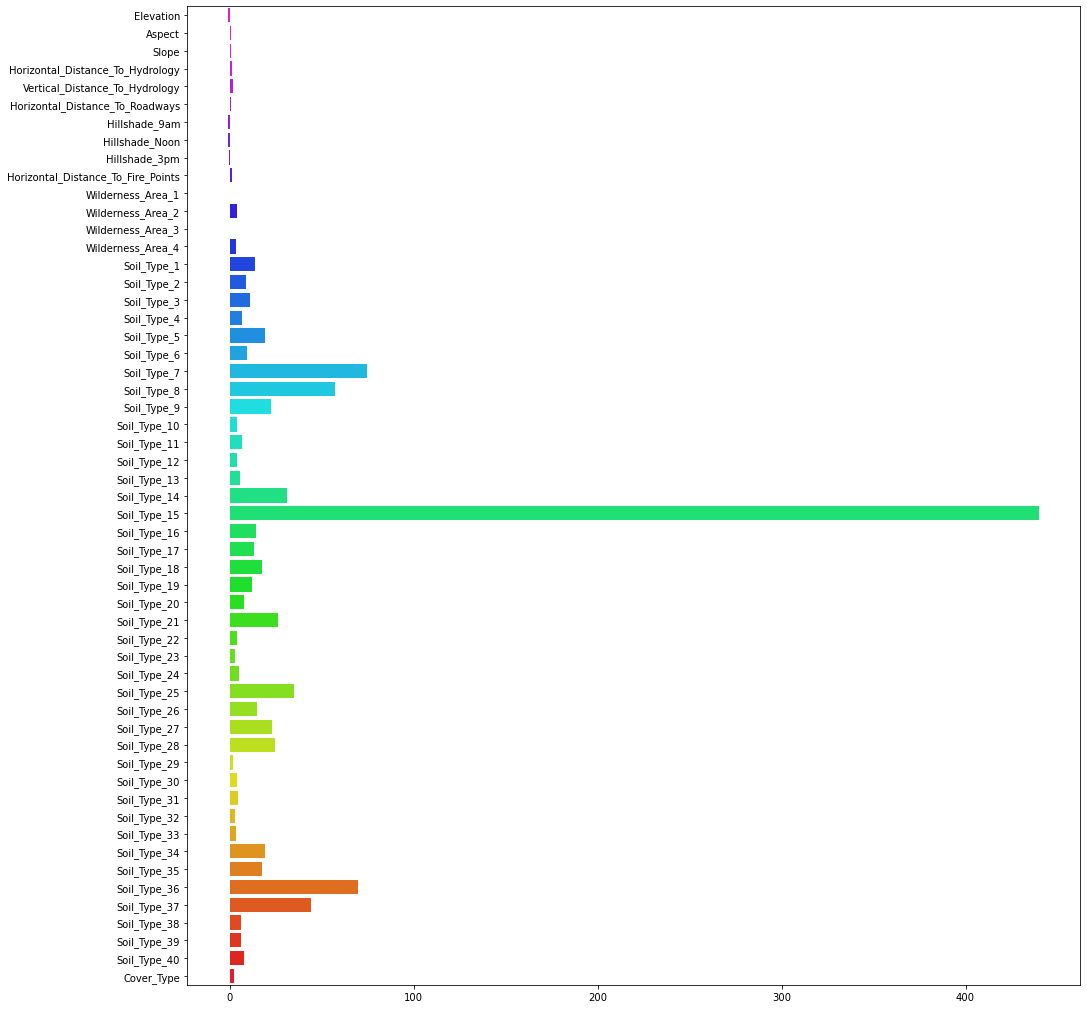

In [14]:
# set up the figure size 
plt.figure(figsize=(16,18))

# plot out the diagram to have a clear view of the skewness
sns.barplot(x=p_df.skew(), y=skewness.index, palette = 'gist_rainbow_r')

# show the plot
plt.show()

#### Findings:

(1) Almost all of the attributes are right skewed, with Soil_Type 15 being the most right skewed (Having a value of 440)

(2) Attributes such as Hillshade_9am, Hillshade_Noon, Hillshade_3pm and Evaluation are the only attributes that is left skewed (Having values less than 1)

In [15]:
#  returns the correlation matrix of the dataframe
p_df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,0.006494,-0.064381,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.125395,-0.086164,0.043061,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,0.083066,-0.024393,0.017757,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.089977,-0.059067,-0.035067,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915,-0.108936


In [16]:
#  returns the correlation matrix of the dataframe
corr_matrix = p_df.corr()
corr_matrix = corr_matrix['Cover_Type'].sort_values(ascending=False)
corr_matrix

Cover_Type                            1.000000
Wilderness_Area_4                     0.323200
Soil_Type_10                          0.243876
Soil_Type_38                          0.160170
Soil_Type_39                          0.155668
Slope                                 0.148285
Soil_Type_40                          0.128351
Soil_Type_2                           0.118135
Soil_Type_6                           0.112958
Soil_Type_4                           0.099672
Soil_Type_1                           0.090828
Soil_Type_17                          0.090582
Vertical_Distance_To_Hydrology        0.081664
Soil_Type_35                          0.080315
Soil_Type_37                          0.080271
Soil_Type_5                           0.077890
Soil_Type_3                           0.068064
Wilderness_Area_3                     0.066846
Soil_Type_14                          0.065562
Soil_Type_11                          0.035379
Soil_Type_36                          0.025397
Soil_Type_13 

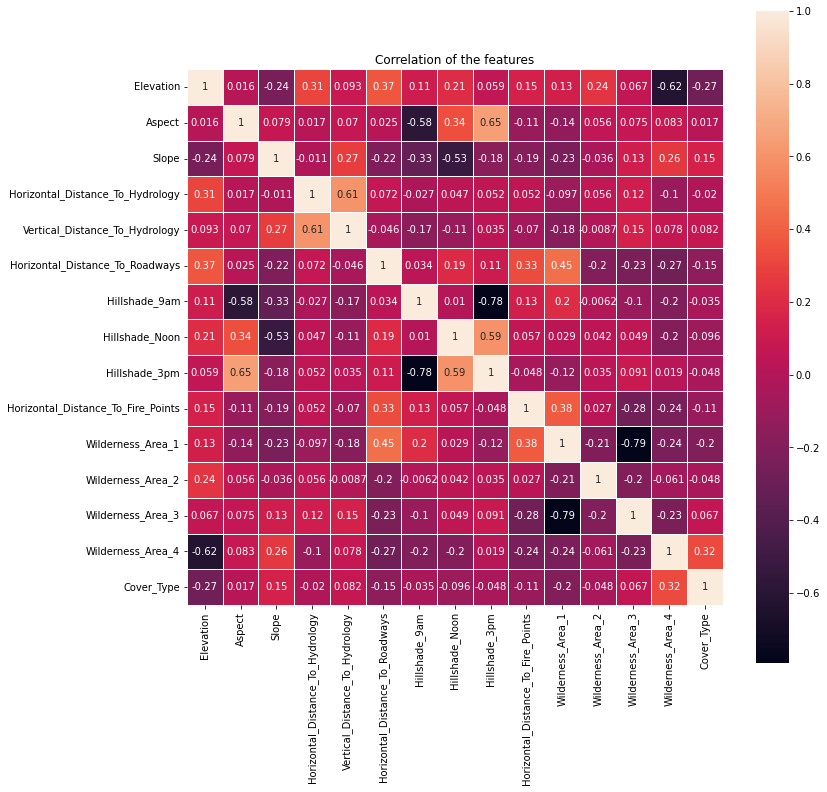

In [17]:
# get and store all the not Soil Type features
columns = [cols for cols in p_df.columns if not str(cols).startswith('Soil')]

# set the figure size
plt.figure(figsize=(12, 12))

# using heapmap to plot
sns.heatmap(p_df[columns].corr(), square=True, linewidths=1, annot = True)

# set the title of the plot
plt.title('Correlation of the features')

# show the plot
plt.show()

#### Findings:

(1) There seems to be positive correlations against 'Cover_Type' with  attributes such as 'Slope' and 'Wilderness_Area_4', having p values of 0.15 and 0.32 respectively. 

(2) There seems to be negative correlations against 'Cover_Type' with  attributes such as 'Elevation', 'Wilderness_Area_1', having p values -0.27 and 0.2 respectively.

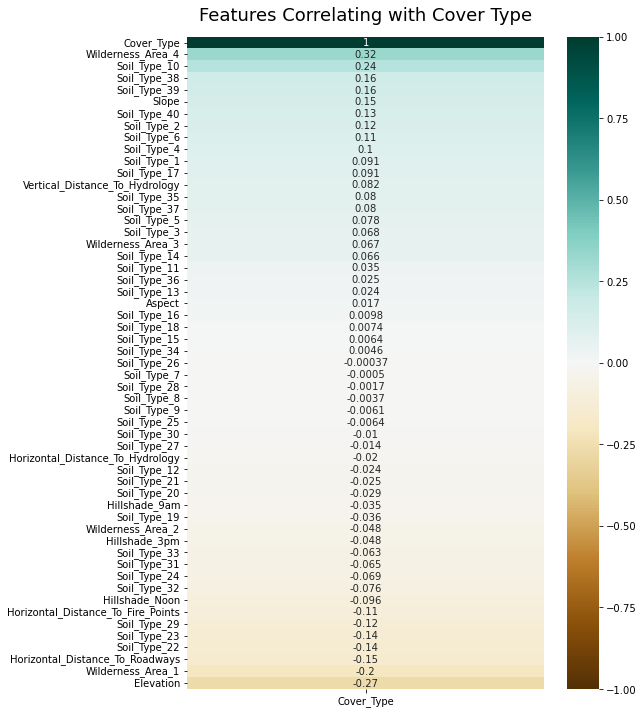

In [18]:
# visualize the correlation of all columns in this dataframe
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(p_df.corr()[['Cover_Type']].sort_values(by='Cover_Type', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Cover Type', fontdict={'fontsize':18}, pad=16);

### Findings:
0.9 to 1 positive or negative indicates a very strong correlation. 0.7 to 0.9 positive or negative indicates a strong correlation. 0.5 to 0.7 positive or negative indicates a moderate correlation. 0.3 to 0.5 positive or negative indicates a weak correlation. 0 to 0.3 positive or negative indicates a negligible correlation.

Based on above, it can be observed that:

(1) There are no strong correlations to with the target (Cover_Type) attribute. Most of the attributes indicate negligible correlations. As such, this means that multiple attributes might have to be factored in to support a prediction. 

The attribute with the most significant correlation with the target (Cover_Type) is Wilderness_Area_4, presenting a positive correlation p value of 0.32. 

(2) Next, as seen from the figure, the strong positive correlation with the target (Cover_Type) is Soil_Type_10, presenting a p value of 0.24 . 

(3) Elevation presents a negative correlation of -0.27 and Wilderness_Area_1 of -0.2.

(4) The weakest correlation amongst the attributes would be Soil_Type_26, of which gives a negative correlation of -0.00037. As such, we are unable to use the attribute to get useful information regarding Load_Type.

(5) The second weakest correlation is Soil_Type_7 which give a negative correlation of -0.005

In [19]:
# show the total number of each cover types in this dataframe
p_df.groupby('Cover_Type').size()

Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
dtype: int64

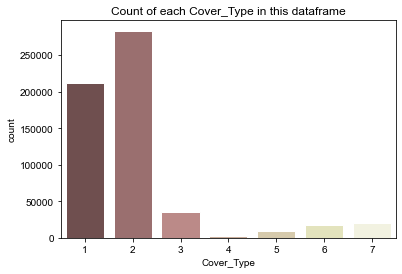

In [20]:
# visualize the count of each 'Cover_Type' in this dataframe
plt.title('Count of each Cover_Type in this dataframe')
sns.set_style('whitegrid')
sns.countplot(x=p_df['Cover_Type'], palette = 'pink')

plt.show()

### Findings
(1) The highest number of count of Cover_Type is Type 2, consisting of count 283301.

(2) The second most count for Cover_Type would be Type 1.

(3) The least number of count of Cover_Type is Type 5.

(4) As such, the figure shows that Type 2 and Type 1 are the most common type of Cover_Type.

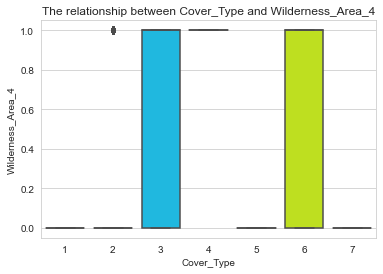

In [21]:
# Visualize the relationship between Cover_Type and Wilderness_Area_4
plt.title('The relationship between Cover_Type and Wilderness_Area_4')
graph = sns.boxplot(data=p_df, x='Cover_Type', y='Wilderness_Area_4', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) Only Cover Type 3 and 6 have a strong correlation with the attribute 'Wilderness_Area_4' 

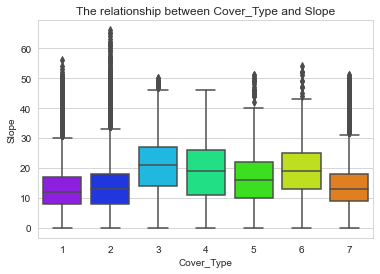

In [22]:
# Visualize the relationship between Cover_Type and slope
plt.title('The relationship between Cover_Type and Slope')
sns.boxplot(data=p_df, x='Cover_Type', y='Slope', palette='gist_rainbow_r')

plt.show()

## Findings

(1) Cover_Type 2 contains the most number of upper outliers, falling between 30 to 80. Cover_Type 1 also presents itself containing the next highest number of upper outliers. As such, this might make it difficult to predict. 

(2) All the cover types contains outliers except Cover_Type 4. 

(3) Generally, the 1st quartile for all  Cover_Type falls between the range of 0 to 10, with Cover_Type 3 and 6 having a slighter higher range. 

(4) The median for Cover_Type 3 is the highest at around 21. It also contains the largest range for slope (Excluding outliers). 

(5) This is a not a recommended feature since there are a lot of outliers which can skew the results.

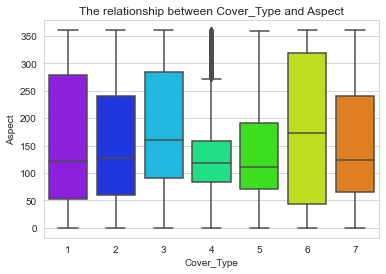

In [23]:
# Visualize the relationship between Cover_type and aspect
plt.title('The relationship between Cover_Type and Aspect')
sns.boxplot(data=p_df, x='Cover_Type', y='Aspect', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) All the cover types do not contain outliers except Cover_Type 4 and is observed to have a larger 3rd quartile range.

(2) Cover_Type 4 has the shortest range for median and 3rd quartile, value wise as compared to the other types. 

(3) Generally, the 1st quartile for all Cover_Type falls between the range of 0 to 60, with Cover_Type 3 having a slighter higher range. 

(4) The median for Cover_Type 6 is the highest at around 160.

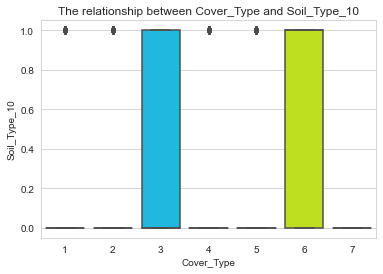

In [24]:
# Visualize the relationship between Cover_Type and Soil_Type_10
plt.title('The relationship between Cover_Type and Soil_Type_10')
sns.boxplot(data=p_df, x='Cover_Type', y='Soil_Type_10', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) Only Cover_Type 3 and 6 have a strong correlation with the attribute 'Soil_Type_10' 

(2) Cover_Type 1, 2, 4 and 5 is observed to contain outliers. 

(3) As such, it does not present itself as a good feature to be used in predicting.

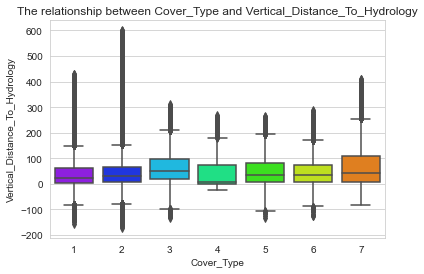

In [25]:
# Visualize the relationship between Cover_type and Vertical_Distance_To_Hydrology
plt.title('The relationship between Cover_Type and Vertical_Distance_To_Hydrology')
sns.boxplot(data=p_df, x='Cover_Type', y='Vertical_Distance_To_Hydrology', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) All the Cover_Type contains upper outliers and lower outliers except for Type 4 and 7. 

(2) Type 2 has the most number of upper outliers and has a huge range of 150 to 600. 

(3) All of the Cover_Type has a median generally between 0 to 50, except for Cover_Type 4. 

(4) Cover_Type 4 is the only Cover_Type that has a shorter range of values. 

(5) With too many outliers present, this is not a feasible and recommended feature. 

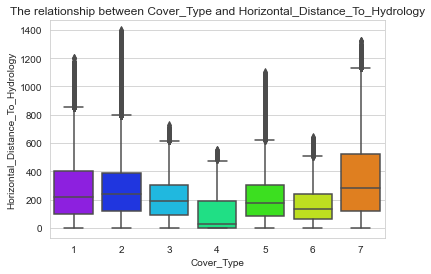

In [26]:
# Visualize the relationship between Cover_type and Horizontal_Distance_To_Hydrology
plt.title('The relationship between Cover_Type and Horizontal_Distance_To_Hydrology')
sns.boxplot(data=p_df, x='Cover_Type', y='Horizontal_Distance_To_Hydrology', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) Cover_Type 4 has the shortest range between 1st quartile and median value

(2) Cover_Type 1 & 2 have similar interquartile range and mean value

(3) Cover_Type 2 has the highest upper outliers

(4) Cover_Type 7 has the largest range between 1st and 3rd quartile

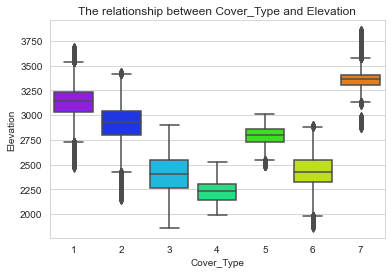

In [27]:
# Visualize the relationship between Cover_Type and Elevation
plt.title('The relationship between Cover_Type and Elevation')
graph = sns.boxplot(data=p_df, x='Cover_Type', y='Elevation', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) Cover_Type 3 & 4 does not have any lower and upper outliers

(2) Cover_Type 7 has the smallest interquartile range while Cover_Type 3 has the largest interquartile range

(3) Cover_Type 7 has the most number of upper outliers while Cover_Type 2 has the most number of lower outliers

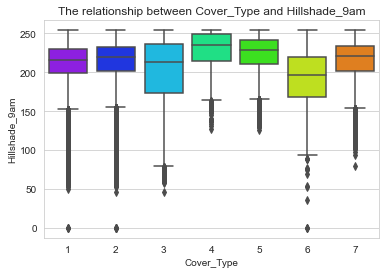

In [28]:
# Visualize the relationship between Cover_type and Hillshade_9am
plt.title('The relationship between Cover_Type and Hillshade_9am')
sns.boxplot(data=p_df, x='Cover_Type', y='Hillshade_9am', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) All cover types doesn't have any upper outliers and maximum value are similar

(2) Cover_Type 1 & 2 have similar median, minimum value and outliers

(3) Cover_Type 4 & 5 have similar median, minimum value and outliers

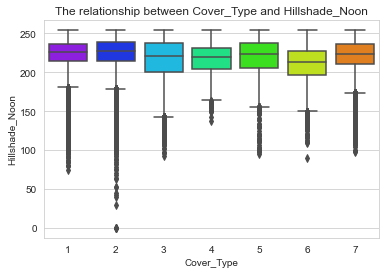

In [29]:
# Visualize the relationship between Cover_type and Hillshade_Noon
plt.title('The relationship between Cover_Type and Hillshade_Noon')
sns.boxplot(data=p_df, x='Cover_Type', y='Hillshade_Noon', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) All cover types have similar maximum value and median are almost ranging the same

(2) All cover types does not have any upper outliers

(3) Cover_Type 2 has the most lower outliers

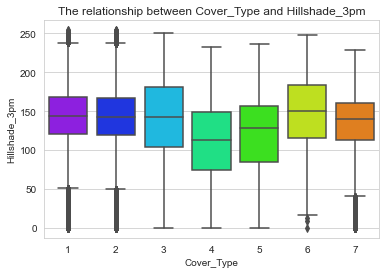

In [30]:
# Visualize the relationship between Cover_type and Hillshade_3pm
plt.title('The relationship between Cover_Type and Hillshade_3pm')
sns.boxplot(data=p_df, x='Cover_Type', y='Hillshade_3pm', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) Cover_Type 3, 4, 5 does not have any upper and lower outliers

(2) Cover_Type 1 & 2 are quite similar in their interquartile range and median, and both have upper and lower outliers

(3) Cover_Type 6 & 7 have similar 25th percentile and median, with Cover_Type 6 having a higher 75th percentile and maximum value

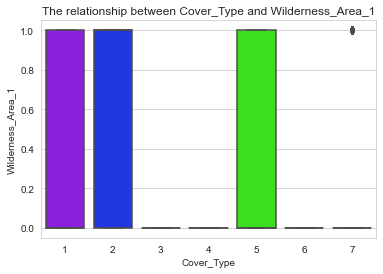

In [31]:
# Visualize the relationship between Cover_Type and Wilderness_Area_1
plt.title('The relationship between Cover_Type and Wilderness_Area_1')

graph = sns.boxplot(data=p_df, x='Cover_Type', y='Wilderness_Area_1', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) Cover_Type 1, 2, 5 have the same interquartile range, while 7 has outliers

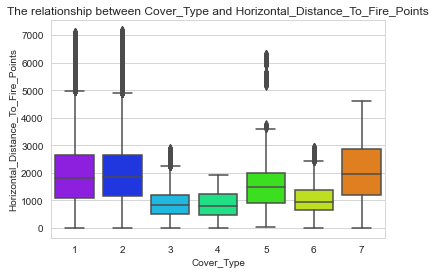

In [32]:
# Visualize the relationship between Cover_type and Horizontal_Distance_To_Fire_Points
plt.title('The relationship between Cover_Type and Horizontal_Distance_To_Fire_Points')
sns.boxplot(data=p_df, x='Cover_Type', y='Horizontal_Distance_To_Fire_Points', palette='gist_rainbow_r')

plt.show()

#### Findings
(1) Cover_Type 4 & 7 does not have any upper and lower outliers

(2) Cover_Type 1 & 2 are mostly similar in their data and relationship to Horizontal_Distance_To_Fire_Points

(3) Cover_Type 5 has upper outliers which are very far from its maximum value

(4) Cover_Type 3 & 4 have similar median and interquartile range

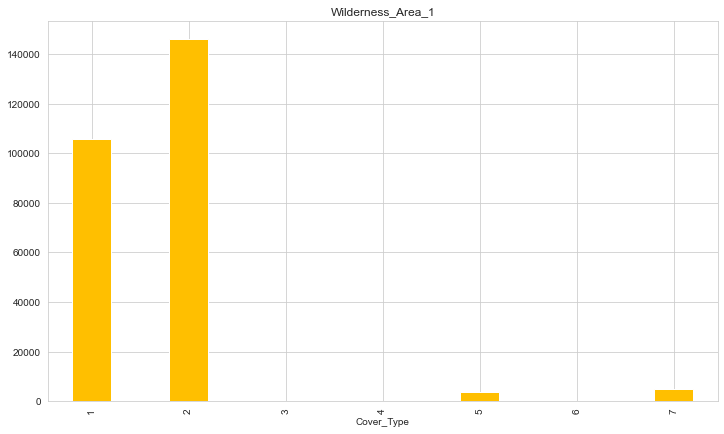

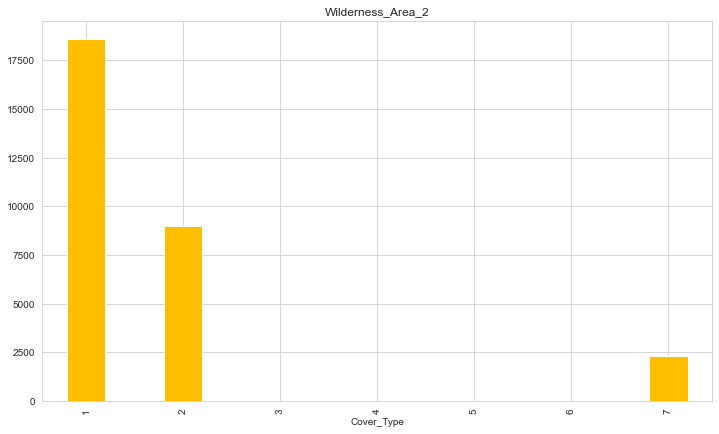

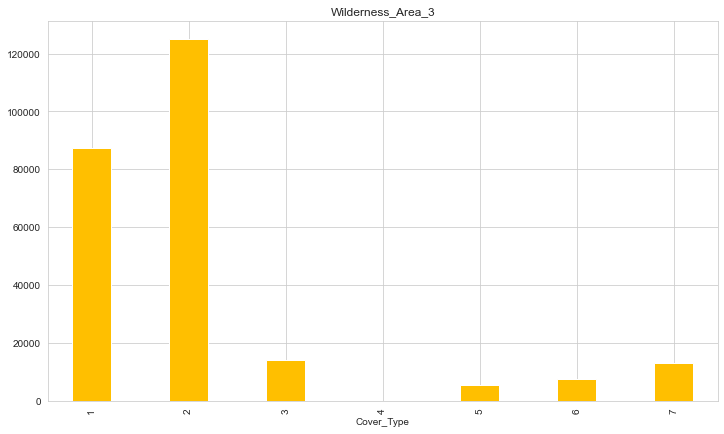

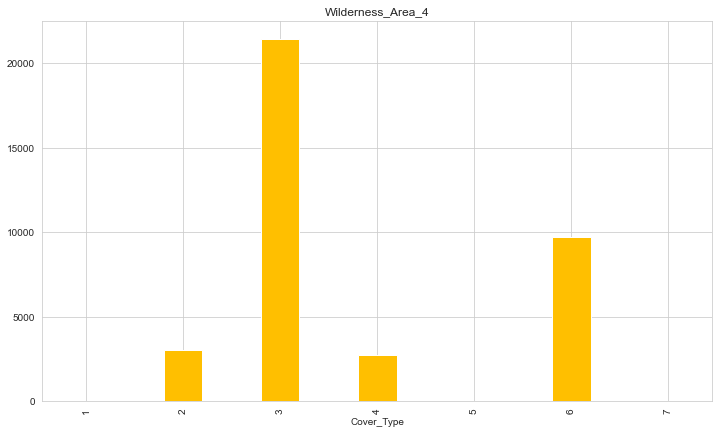

In [33]:
# define the columns to be plotted out
areas = ['Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4']
    
# using for loop to generate the graph
for i in range(len(areas)):
    
    # plot i number of graphs
    plt.figure(i, figsize=(12, 7))
 
    # group by each of the cover type and sum each of them
    p_df.groupby('Cover_Type')[areas[i]].sum().plot.bar(width = 0.4, color='#ffbf00')
    
    # display the title name
    plt.title(areas[i])

### Findings:
(1) Wilderness_Area_1 does not have any values for Cover_Type 3, 4, 6

(2) Wilderness_Area_2 only have values for Cover_Type 1, 2, 7

(3) Wilderness_Area_3 have values for all cover types, except for Cover_Type 4

(4) Wilderness_Area_4 has the highest number of values for Cover_Type 3

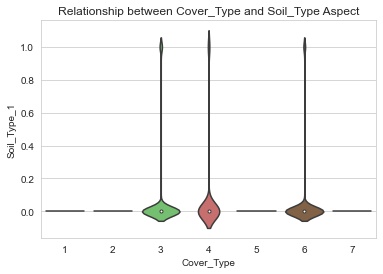

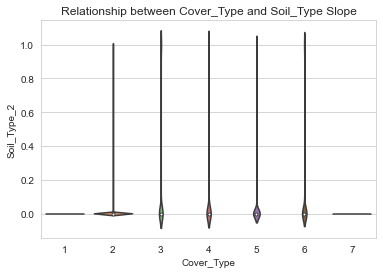

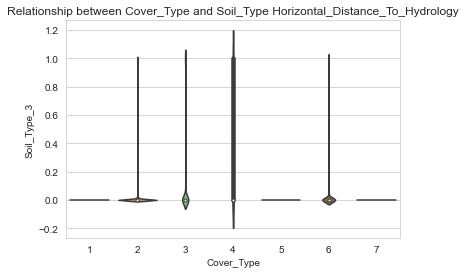

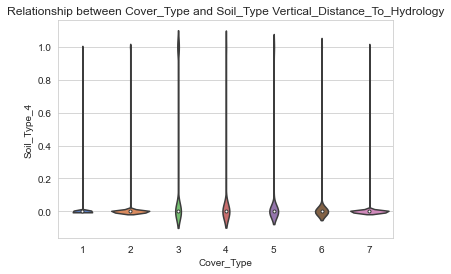

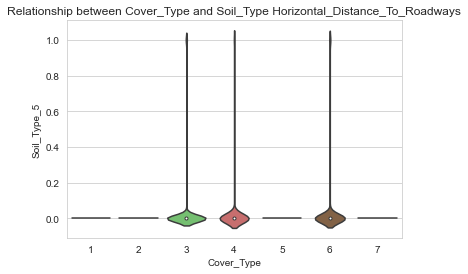

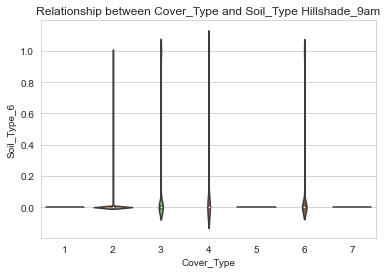

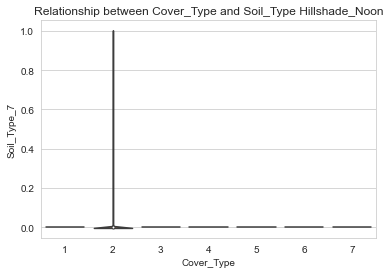

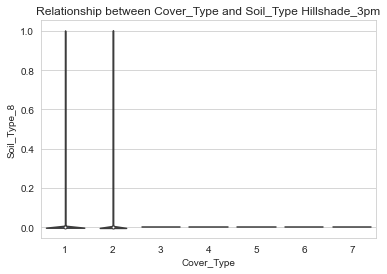

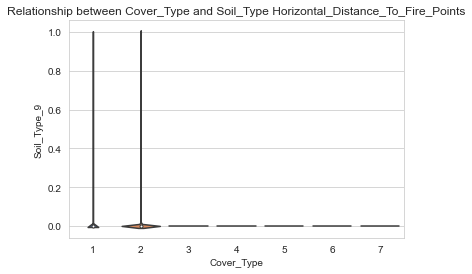

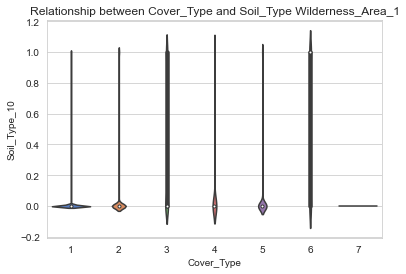

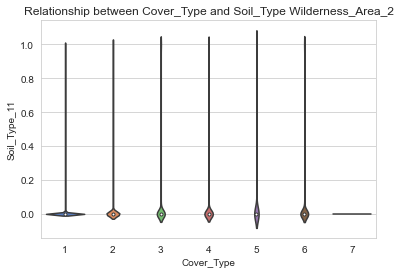

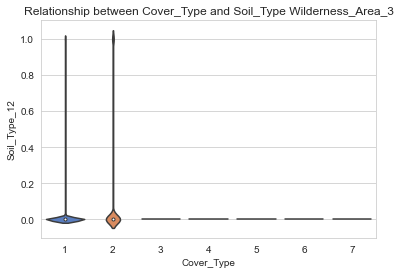

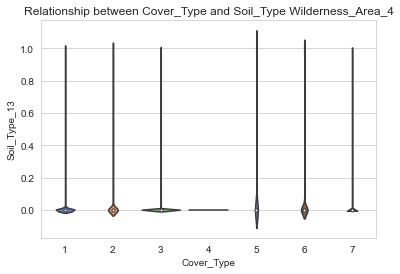

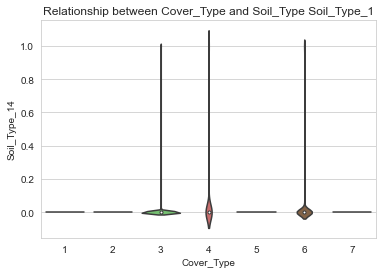

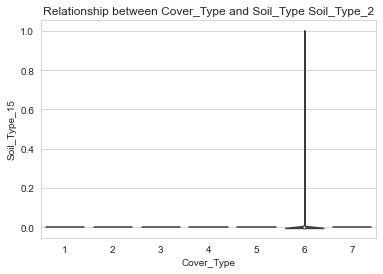

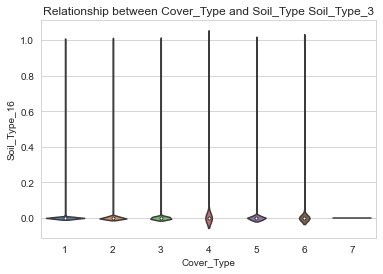

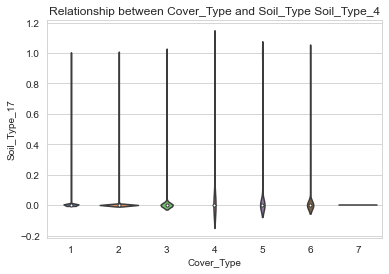

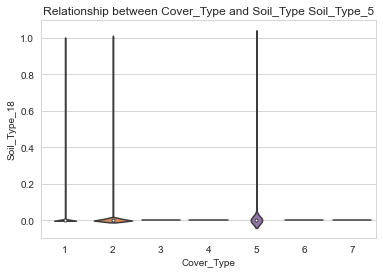

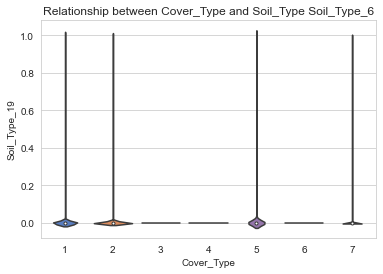

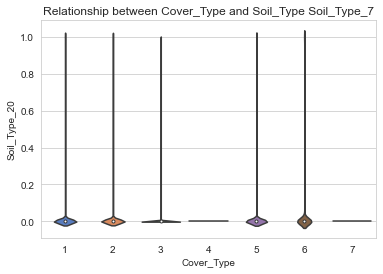

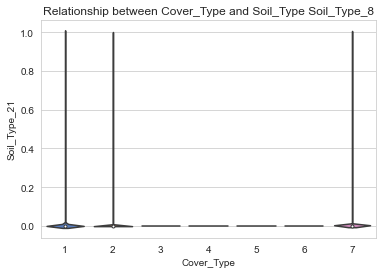

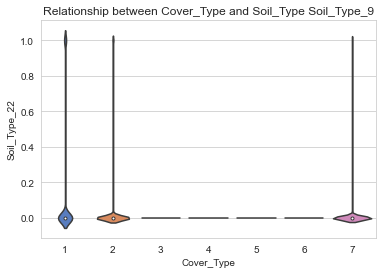

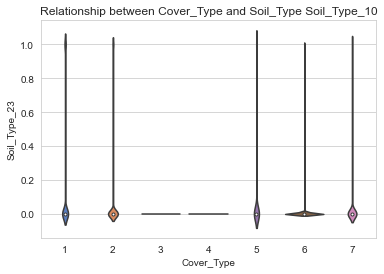

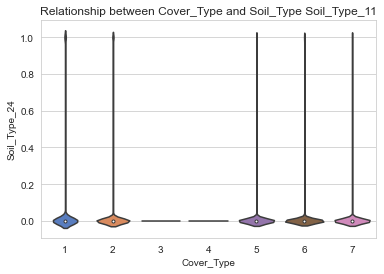

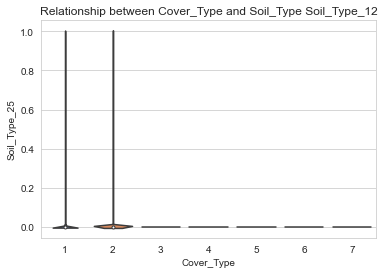

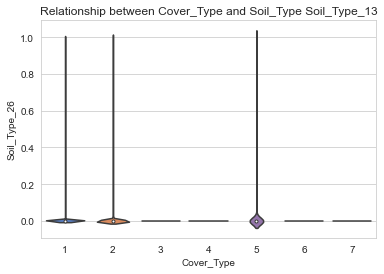

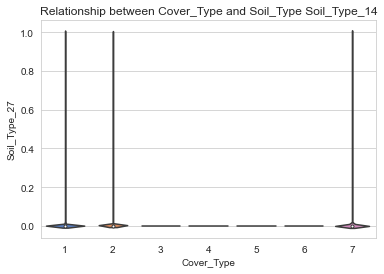

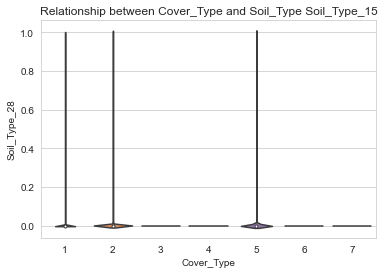

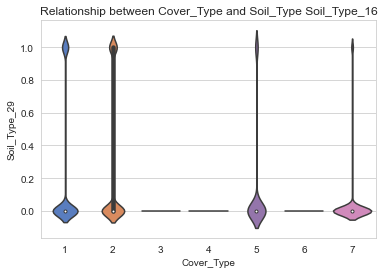

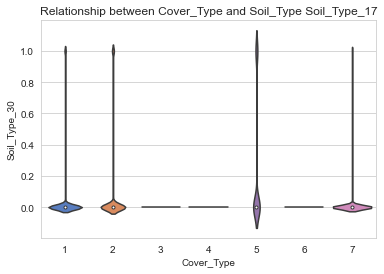

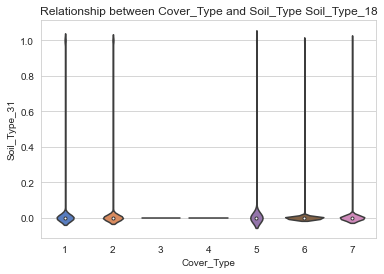

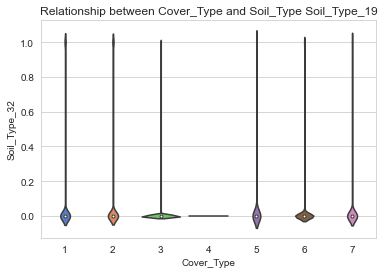

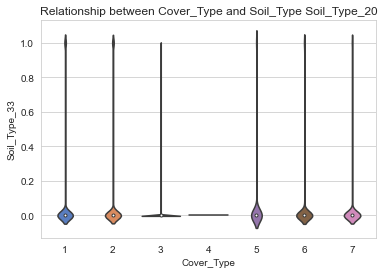

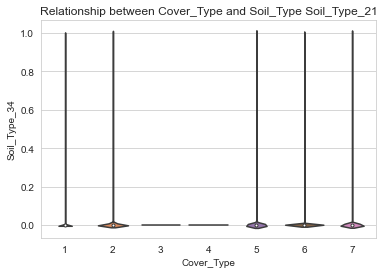

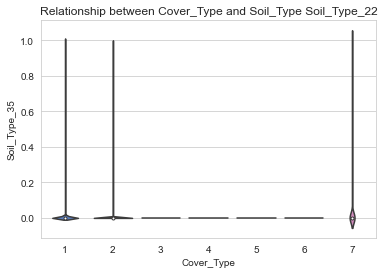

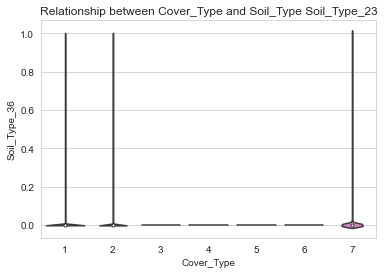

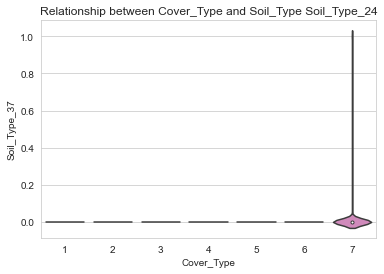

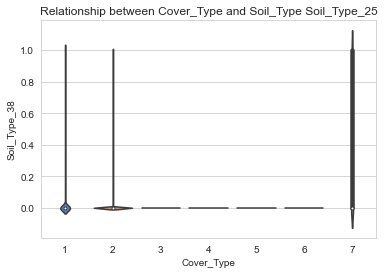

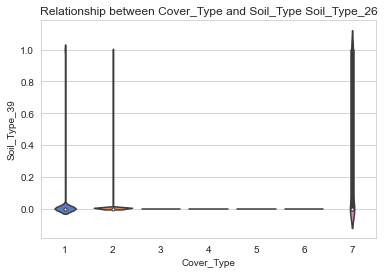

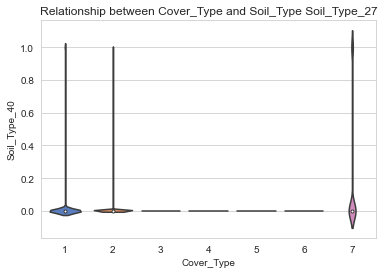

In [34]:
# get all columns name
all_columns = p_df.columns

# eliminate the target column
eliminate_target = len(all_columns)-1

# x-axis is for target column
x = all_columns[eliminate_target]

# y-axis is for the features
y = all_columns[14:eliminate_target]

# plot out the graph
for a in range(0, 40):
    sns.violinplot(data=p_df, x=x, y=y[a], palette="muted")
    
    # set the title for each of the graphes
    plt.title('Relationship between Cover_Type and Soil_Type ' + all_columns[a+1])
    plt.show()

### Findings:
(1) Soil Type 7, 15, 37 have only values for 1 cover type

(2) Generally most soil types have low or 0 values for each cover type

(3) Soil Type 4 is the only one that have values for each cover type

## Prepare the data for machine learning algorithms

### Stratified split for training and testing dataset

In [35]:
df.groupBy("Cover_Type").count().show()

+----------+------+
|Cover_Type| count|
+----------+------+
|         7| 20510|
|         3| 35754|
|         5|  9493|
|         6| 17367|
|         1|211840|
|         4|  2747|
|         2|283301|
+----------+------+



In [36]:
for name in newColNames:
    df = df.withColumn(name,df[name].cast(IntegerType()))

In [37]:
numericCols = newColNames[:-1]
assembler = VectorAssembler(inputCols=numericCols, outputCol="features")
df = assembler.transform(df)

In [38]:
df.show(vertical = True)

-RECORD 0--------------------------------------------------
 Elevation                          | 2596                 
 Aspect                             | 51                   
 Slope                              | 3                    
 Horizontal_Distance_To_Hydrology   | 258                  
 Vertical_Distance_To_Hydrology     | 0                    
 Horizontal_Distance_To_Roadways    | 510                  
 Hillshade_9am                      | 221                  
 Hillshade_Noon                     | 232                  
 Hillshade_3pm                      | 148                  
 Horizontal_Distance_To_Fire_Points | 6279                 
 Wilderness_Area_1                  | 1                    
 Wilderness_Area_2                  | 0                    
 Wilderness_Area_3                  | 0                    
 Wilderness_Area_4                  | 0                    
 Soil_Type_1                        | 0                    
 Soil_Type_2                        | 0 

In [39]:
# Taking 70% of both 0's and 1's into training set
train = df.sampleBy("Cover_Type", fractions={1: 0.66,2: 0.66,3: 0.66,4: 0.66,5: 0.66,6: 0.66,7: 0.66}, seed=45698)
# Subtracting 'train' from original 'data' to get test set 
test = df.subtract(train)

In [40]:
train.groupBy("Cover_Type").count().show()

+----------+------+
|Cover_Type| count|
+----------+------+
|         1|139893|
|         6| 11563|
|         3| 23421|
|         5|  6331|
|         4|  1837|
|         7| 13495|
|         2|186928|
+----------+------+



In [41]:
test.groupBy("Cover_Type").count().show()

+----------+-----+
|Cover_Type|count|
+----------+-----+
|         1|71947|
|         6| 5804|
|         3|12333|
|         5| 3162|
|         4|  910|
|         7| 7015|
|         2|96373|
+----------+-----+



## (1) Random Forest Classifier

In [42]:
# Initialize Random Forest object
rf = RandomForestClassifier(featuresCol = 'features',labelCol = 'Cover_Type')

# Fit model to train dataset
rfModel = rf.fit(train)

# Make predictions on test dataset
predictions = rfModel.transform(test)

In [43]:
# Evaluate model
evaluator = MulticlassClassificationEvaluator(labelCol="Cover_Type", predictionCol="prediction")

# Get accuracy from model
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %s" % (accuracy))

Accuracy = 0.64175536417487


## (1) Random Forest Classifier Tuning

In [44]:
# Initialize Random Forest object
rf = RandomForestClassifier(labelCol="Cover_Type", featuresCol="features")

In [45]:
# Use ParamGridBuilder to tune the model.
rfparamGrid = (ParamGridBuilder()

               .addGrid(rf.maxDepth, [2, 5, 10])

               .addGrid(rf.maxBins, [5, 10, 20])

               .addGrid(rf.numTrees, [5, 20, 50])
             .build())

In [46]:
# Evaluate model
evaluator = MulticlassClassificationEvaluator(labelCol="Cover_Type", predictionCol="prediction")

In [47]:
# Create 5-fold CrossValidator
rfcv = CrossValidator(estimator = rf,
                      estimatorParamMaps = rfparamGrid,
                      evaluator = evaluator,
                      numFolds = 5)

In [48]:
# Run cross validation
rfcvModel = rfcv.fit(train)
print(rfcvModel)

22/02/26 00:05:19 WARN DAGScheduler: Broadcasting large task binary with size 1251.9 KiB
22/02/26 00:05:19 WARN DAGScheduler: Broadcasting large task binary with size 1858.4 KiB
22/02/26 00:05:20 WARN DAGScheduler: Broadcasting large task binary with size 1134.1 KiB
22/02/26 00:05:27 WARN DAGScheduler: Broadcasting large task binary with size 1151.2 KiB
22/02/26 00:05:28 WARN DAGScheduler: Broadcasting large task binary with size 1852.0 KiB
22/02/26 00:05:29 WARN DAGScheduler: Broadcasting large task binary with size 2.8 MiB
22/02/26 00:05:31 WARN DAGScheduler: Broadcasting large task binary with size 4.3 MiB
22/02/26 00:05:33 WARN DAGScheduler: Broadcasting large task binary with size 2.5 MiB
22/02/26 00:05:41 WARN DAGScheduler: Broadcasting large task binary with size 1313.3 KiB
22/02/26 00:05:41 WARN DAGScheduler: Broadcasting large task binary with size 1996.4 KiB
22/02/26 00:05:42 WARN DAGScheduler: Broadcasting large task binary with size 1304.6 KiB
22/02/26 00:05:48 WARN DAGSche

22/02/26 00:12:45 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
22/02/26 00:12:46 WARN DAGScheduler: Broadcasting large task binary with size 4.8 MiB
22/02/26 00:12:50 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
22/02/26 00:14:02 WARN DAGScheduler: Broadcasting large task binary with size 1288.7 KiB
22/02/26 00:14:03 WARN DAGScheduler: Broadcasting large task binary with size 1933.8 KiB
22/02/26 00:14:04 WARN DAGScheduler: Broadcasting large task binary with size 1190.3 KiB
22/02/26 00:14:09 WARN DAGScheduler: Broadcasting large task binary with size 1164.2 KiB
22/02/26 00:14:11 WARN DAGScheduler: Broadcasting large task binary with size 1872.9 KiB
22/02/26 00:14:12 WARN DAGScheduler: Broadcasting large task binary with size 2.8 MiB
22/02/26 00:14:14 WARN DAGScheduler: Broadcasting large task binary with size 4.3 MiB
22/02/26 00:14:16 WARN DAGScheduler: Broadcasting large task binary with size 2.5 MiB
22/02/26 00:14:24 WARN DAGScheduler: Br

CrossValidatorModel_79585705ee8b


In [49]:
# Use the best model identified by the cross-validation to make predictions on the test dataset,
rfpredictions = rfcvModel.transform(test)

# Evaluate model and print accuracy
print('Accuracy after tuning:', evaluator.evaluate(rfpredictions))

22/02/26 00:15:42 WARN DAGScheduler: Broadcasting large task binary with size 3.3 MiB


Accuracy after tuning: 0.719494058021479


The accuracy after tuning has an improvement of 6%, from 64.17% to 71.9%

## (2) Decision Tree Classifier

In [50]:
dt = DecisionTreeClassifier(labelCol="Cover_Type", featuresCol="features")
# Run cross-validation
# training
model_dt = dt.fit(train)

In [51]:
# testing
predict_dt = model_dt.transform(test)
evaluator = MulticlassClassificationEvaluator(labelCol = 'Cover_Type',
                                              predictionCol = 'prediction', 
                                              metricName = 'accuracy')
accuracy = evaluator.evaluate(predict_dt)
print(f"Decision Test Accuracy (pre-tuning) : {accuracy * 100:.5f}% ")

Decision Test Accuracy (pre-tuning) : 70.10944% 


## (2) Decision Tree Classifier Tuning

In [52]:
dtparamGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [2, 5, 10])
             .addGrid(dt.maxBins, [10, 20])
             .build())

In [53]:
cvEvaluator = MulticlassClassificationEvaluator(metricName="accuracy", labelCol = 'Cover_Type')

# Create 5-fold CrossValidator
dtcv = CrossValidator(estimator = dt,
                      estimatorParamMaps = dtparamGrid,
                      evaluator = cvEvaluator,
                      numFolds = 5)

In [54]:
# training
dtcvModel = dtcv.fit(train)

dtpredictions = dtcvModel.transform(test)

In [55]:
# testing
accuracy = cvEvaluator.evaluate(dtpredictions)
print(f"Decision Test Accuracy (post-tuning) : {accuracy * 100:.5f}% ")

Decision Test Accuracy (post-tuning) : 77.59740% 


## (3) Logistic Regression Classifier


In [56]:
lr = LogisticRegression(featuresCol="features", labelCol="Cover_Type", maxIter = 100, regParam = 0.3)

lrModel = lr.fit(train)
pred_lr = lrModel.transform(test)
evaluator = MulticlassClassificationEvaluator(labelCol="Cover_Type", predictionCol="prediction")
accuracy = evaluator.evaluate(pred_lr)

22/02/26 00:17:55 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/02/26 00:17:55 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
22/02/26 00:17:56 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/02/26 00:17:56 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


In [57]:
print(f"Logistic Regression Accuracy (pre-tuning) : {accuracy * 100:.5f}% ")

Logistic Regression Accuracy (pre-tuning) : 61.41395% 


In [58]:
print("Accuracy = %s" % (accuracy))
print("Test Error = %s" % (1.0 - accuracy))

Accuracy = 0.6141395157161437
Test Error = 0.38586048428385633


## (3) Logistic Regression Classifier Tuning

In [59]:
lr = LogisticRegression(labelCol="Cover_Type", featuresCol="features")

In [60]:
lrparamGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.1, 0.5, 1.0, 2.0])
             .build())

In [62]:
# Create 5-fold CrossValidator
lrcv = CrossValidator(estimator = lr,
                    estimatorParamMaps = lrparamGrid,
                    evaluator = evaluator,
                    numFolds = 5)

In [63]:
# Cross validations and fitting
lrcvModel = lrcv.fit(train)

In [64]:
# Transform
lrpredictions = lrcvModel.transform(test)

In [66]:
# After tuning 
accuracynb1 = evaluator.evaluate(lrpredictions)
print(f"Logistic Regression Accuracy (post-tuning) : {accuracynb1 * 100:.5f}% ")

Logistic Regression Accuracy (post-tuning) : 69.83250% 


#### Findings:

(1) There is an increase in accuracy from 61% to 68% after tuning the model. 

(2) By making use of ParamGridBuilder, it sets the given parameters to fixed values on the parameters listed, such as 0.01, 0.1 etc. 

(3) The CrossValidator does k-fold crossing, in which k= 5 folds in this scenario. K-fold cross validation will generate 5 sets of dataset pairs, (training and test), with each of will use 2/3 for training and 1/3 for testing. The dataset pairs are non-overlapping randomly partitioned folds.

#### Conclusion for findings in comparison of 3 classification models used.

Various models such as Random Forest model, Logistic Regression model and Tree Classifier model was used in this task to solve the classification problem.

Amongst the models used, The Decision Tree Model was observed to have generated the best results after tuning the models. Decision Tree fared the best in achieving as it was able to generate 70% pre-tuning and 77% after tuning. 

Across the 3 models, there was a general trend in increased accuracy of 7%. This would mean that the 3 models used did not present any underfitting and overfitting problem.

## User-Defined Transform functionality

In [ ]:
new_df = spark.read.format("csv").option("header",False).option("delimiter",',').option("ignoreTrailingWhiteSpace", True).load("covtype.data")
newColNames =  [
                "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points", "Wilderness_Area_1", "Wilderness_Area_2",
                "Wilderness_Area_3", "Wilderness_Area_4", "Soil_Type_1", 
                "Soil_Type_2", "Soil_Type_3", "Soil_Type_4", "Soil_Type_5", 
                "Soil_Type_6", "Soil_Type_7", "Soil_Type_8", "Soil_Type_9", "Soil_Type_10", 
                "Soil_Type_11", "Soil_Type_12", "Soil_Type_13", "Soil_Type_14", "Soil_Type_15", 
                "Soil_Type_16", "Soil_Type_17", "Soil_Type_18", "Soil_Type_19", "Soil_Type_20", 
                "Soil_Type_21", "Soil_Type_22", "Soil_Type_23", "Soil_Type_24", "Soil_Type_25", 
                "Soil_Type_26", "Soil_Type_27", "Soil_Type_28", "Soil_Type_29", "Soil_Type_30", 
                "Soil_Type_31", "Soil_Type_32", "Soil_Type_33", "Soil_Type_34", "Soil_Type_35", 
                "Soil_Type_36", "Soil_Type_37", "Soil_Type_38", "Soil_Type_39", 
                "Soil_Type_40", "Cover_Type"]

new_df = new_df.toDF(*newColNames)
for name in newColNames:
    new_df = new_df.withColumn(name,new_df[name].cast(IntegerType()))
from pyspark.ml.feature import Bucketizer
bucketizer = Bucketizer(splits=[ 0,2278, 2809, 2996, 3163,3694, float('Inf') ],inputCol="Elevation", outputCol="Elevation_Levels")
df_buck = bucketizer.setHandleInvalid("keep").transform(new_df)

df_buck = df_buck.drop(df_buck.Elevation)#drop original Elevation value
df_buck = df_buck.select([df_buck.columns[-1]] + df_buck.columns[:-1])
newColNames =  [
                "Elevation_Levels","Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points", "Wilderness_Area_1", "Wilderness_Area_2",
                "Wilderness_Area_3", "Wilderness_Area_4", "Soil_Type_1", 
                "Soil_Type_2", "Soil_Type_3", "Soil_Type_4", "Soil_Type_5", 
                "Soil_Type_6", "Soil_Type_7", "Soil_Type_8", "Soil_Type_9", "Soil_Type_10", 
                "Soil_Type_11", "Soil_Type_12", "Soil_Type_13", "Soil_Type_14", "Soil_Type_15", 
                "Soil_Type_16", "Soil_Type_17", "Soil_Type_18", "Soil_Type_19", "Soil_Type_20", 
                "Soil_Type_21", "Soil_Type_22", "Soil_Type_23", "Soil_Type_24", "Soil_Type_25", 
                "Soil_Type_26", "Soil_Type_27", "Soil_Type_28", "Soil_Type_29", "Soil_Type_30", 
                "Soil_Type_31", "Soil_Type_32", "Soil_Type_33", "Soil_Type_34", "Soil_Type_35", 
                "Soil_Type_36", "Soil_Type_37", "Soil_Type_38", "Soil_Type_39", 
                "Soil_Type_40", "Cover_Type"]
numericCols = newColNames[:-1]
assembler = VectorAssembler(inputCols=numericCols, outputCol="features")
df_buck = assembler.transform(df_buck)
# Taking 70% of both 0's and 1's into training set
train = df_buck.sampleBy("Cover_Type", fractions={1: 0.66,2: 0.66,3: 0.66,4: 0.66,5: 0.66,6: 0.66,7: 0.66}, seed=42069)
# Subtracting 'train' from original 'data' to get test set 
test = df_buck.subtract(train)
train.groupBy("Cover_Type").count().show()
test.groupBy("Cover_Type").count().show()
# Fit the model to the data
dtcvModel1 = dtcv.fit(train)

# Score the testing dataset using your fitted model for evaluation purposes
dtpredictions1 = dtcvModel1.transform(test)
#Evaluate the model
accuracy = evaluator.evaluate(dtpredictions1)
print("Accuracy after tuning = %s" % (accuracy))
print("Test Error after tuning = %s" % (1.0 - accuracy))